# **The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/car_fuel_efficiency.csv')
display(df.head())

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df_filtered = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
display(df_filtered.head())

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


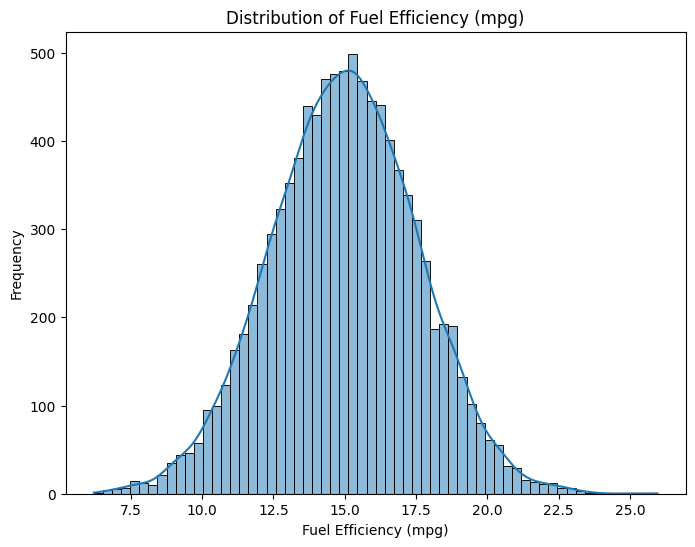

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['fuel_efficiency_mpg'], kde=True)
plt.title('Distribution of Fuel Efficiency (mpg)')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of 'fuel_efficiency_mpg'. Based on the shape, it appears to be roughly symmetrical and does not have a significant long tail.

Question 1
There's one column with missing values. What is it?

In [7]:
df_filtered.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [6]:
median_horsepower = df_filtered['horsepower'].median()
print(f"The median horsepower is: {median_horsepower}")

The median horsepower is: 149.0


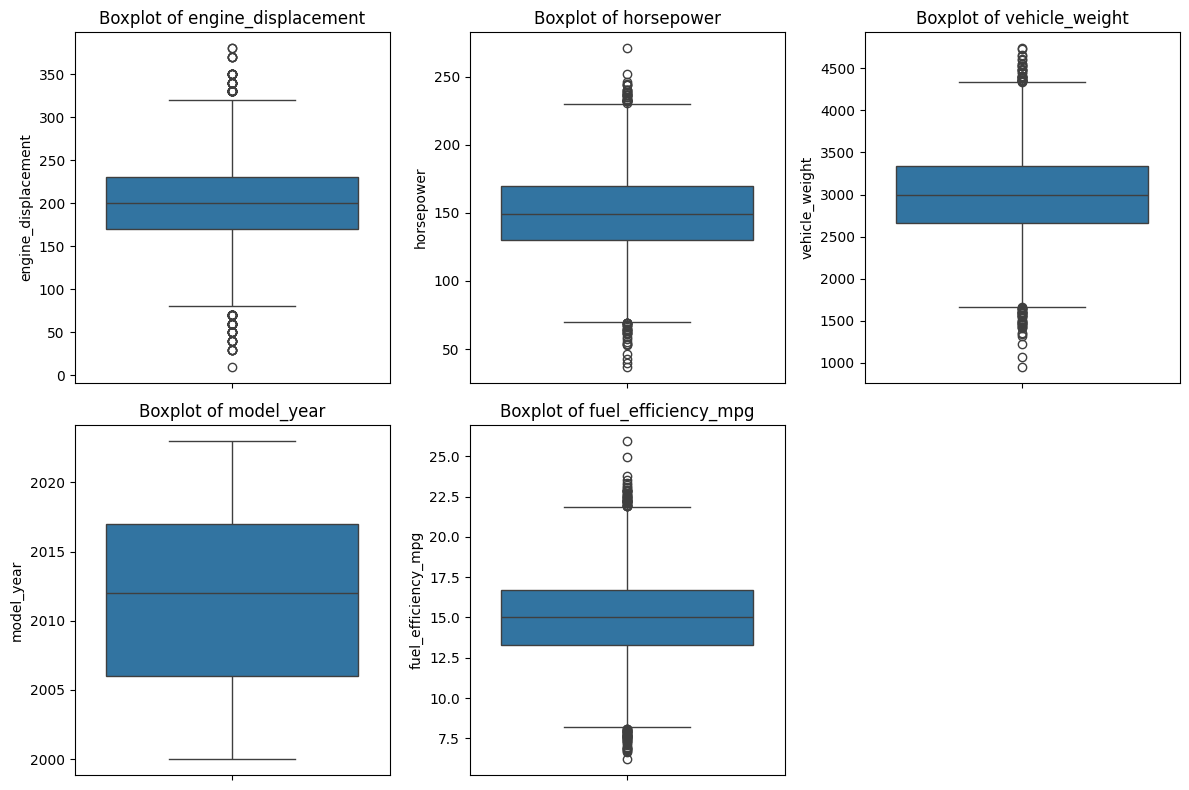

In [8]:
numerical_cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_filtered[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [9]:
df_shuffled = df_filtered.sample(frac=1, random_state=42)

df_train, df_temp = train_test_split(df_shuffled, test_size=0.4, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

print(f"Train set shape: {df_train.shape}")
print(f"Validation set shape: {df_val.shape}")
print(f"Test set shape: {df_test.shape}")

Train set shape: (5822, 5)
Validation set shape: (1941, 5)
Test set shape: (1941, 5)


Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good

## Identify missing values




In [10]:
print("Missing values in 'horsepower' for df_train:")
print(df_train['horsepower'].isnull().sum())

print("\nMissing values in 'horsepower' for df_val:")
print(df_val['horsepower'].isnull().sum())

print("\nMissing values in 'horsepower' for df_test:")
print(df_test['horsepower'].isnull().sum())

Missing values in 'horsepower' for df_train:
420

Missing values in 'horsepower' for df_val:
151

Missing values in 'horsepower' for df_test:
137


## Impute with 0



In [11]:
df_train_imputed_0 = df_train.copy()
df_train_imputed_0['horsepower'] = df_train_imputed_0['horsepower'].fillna(0)

df_val_imputed_0 = df_val.copy()
df_val_imputed_0['horsepower'] = df_val_imputed_0['horsepower'].fillna(0)

df_test_imputed_0 = df_test.copy()
df_test_imputed_0['horsepower'] = df_test_imputed_0['horsepower'].fillna(0)

print("Missing values in 'horsepower' for df_train_imputed_0:")
print(df_train_imputed_0['horsepower'].isnull().sum())

print("\nMissing values in 'horsepower' for df_val_imputed_0:")
print(df_val_imputed_0['horsepower'].isnull().sum())

print("\nMissing values in 'horsepower' for df_test_imputed_0:")
print(df_test_imputed_0['horsepower'].isnull().sum())

Missing values in 'horsepower' for df_train_imputed_0:
0

Missing values in 'horsepower' for df_val_imputed_0:
0

Missing values in 'horsepower' for df_test_imputed_0:
0


## Train model with 0 imputation



In [12]:
X_train_0 = df_train_imputed_0.drop('fuel_efficiency_mpg', axis=1)
y_train_0 = df_train_imputed_0['fuel_efficiency_mpg']

model_0 = LinearRegression()

model_0.fit(X_train_0, y_train_0)

LinearRegression()

## Evaluate model with 0 imputation


In [13]:
X_val_0 = df_val_imputed_0.drop('fuel_efficiency_mpg', axis=1)
y_val_0 = df_val_imputed_0['fuel_efficiency_mpg']

y_pred_val_0 = model_0.predict(X_val_0)

mse_val_0 = mean_squared_error(y_val_0, y_pred_val_0)
rmse_val_0 = np.sqrt(mse_val_0)

print(f"RMSE on the validation set (imputed with 0): {rmse_val_0:.2f}")

RMSE on the validation set (imputed with 0): 0.51


## Impute with training mean


In [14]:
train_horsepower_mean = df_train['horsepower'].mean()
print(f"The mean horsepower of the training set is: {train_horsepower_mean:.2f}")

df_train_imputed_mean = df_train.copy()
df_train_imputed_mean['horsepower'] = df_train_imputed_mean['horsepower'].fillna(train_horsepower_mean)

df_val_imputed_mean = df_val.copy()
df_val_imputed_mean['horsepower'] = df_val_imputed_mean['horsepower'].fillna(train_horsepower_mean)

df_test_imputed_mean = df_test.copy()
df_test_imputed_mean['horsepower'] = df_test_imputed_mean['horsepower'].fillna(train_horsepower_mean)

print("\nMissing values after mean imputation:")
print("df_train_imputed_mean:", df_train_imputed_mean['horsepower'].isnull().sum())
print("df_val_imputed_mean:", df_val_imputed_mean['horsepower'].isnull().sum())
print("df_test_imputed_mean:", df_test_imputed_mean['horsepower'].isnull().sum())

The mean horsepower of the training set is: 149.28

Missing values after mean imputation:
df_train_imputed_mean: 0
df_val_imputed_mean: 0
df_test_imputed_mean: 0


## Train model with mean imputation



In [15]:
X_train_mean = df_train_imputed_mean.drop('fuel_efficiency_mpg', axis=1)
y_train_mean = df_train_imputed_mean['fuel_efficiency_mpg']

model_mean = LinearRegression()

model_mean.fit(X_train_mean, y_train_mean)

LinearRegression()

## Evaluate model with mean imputation




In [16]:
X_val_mean = df_val_imputed_mean.drop('fuel_efficiency_mpg', axis=1)
y_val_mean = df_val_imputed_mean['fuel_efficiency_mpg']

y_pred_val_mean = model_mean.predict(X_val_mean)

mse_val_mean = mean_squared_error(y_val_mean, y_pred_val_mean)
rmse_val_mean = np.sqrt(mse_val_mean)

print(f"RMSE on the validation set (imputed with mean): {rmse_val_mean:.2f}")

RMSE on the validation set (imputed with mean): 0.46


## Compare rmse




In [17]:
print(f"RMSE with 0 imputation: {rmse_val_0:.2f}")
print(f"RMSE with mean imputation: {rmse_val_mean:.2f}")

if rmse_val_mean < rmse_val_0:
    print("Mean imputation resulted in a lower RMSE and performed better on the validation set.")
elif rmse_val_mean > rmse_val_0:
    print("0 imputation resulted in a lower RMSE and performed better on the validation set.")
else:
    print("Both imputation methods resulted in the same RMSE on the validation set.")

RMSE with 0 imputation: 0.51
RMSE with mean imputation: 0.46
Mean imputation resulted in a lower RMSE and performed better on the validation set.


## Summary:



*   The training dataset had 420 missing values in the 'horsepower' column, the validation set had 151, and the test set had 137.
*   Imputing missing 'horsepower' values with 0 resulted in a validation RMSE of 0.51 for the linear regression model.
*   The mean of the 'horsepower' column in the original training set was approximately 149.28.
*   Imputing missing 'horsepower' values with the training mean resulted in a validation RMSE of 0.46 for the linear regression model.
*   Mean imputation resulted in a lower RMSE (0.46) compared to 0 imputation (0.51) on the validation set.

### Insights

*   Imputing missing values with the mean of the training data appears to be a more effective strategy than imputing with 0 for this dataset and model, leading to better prediction accuracy as measured by RMSE.


Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If multiple options give the same best RMSE, select the smallest r

In [36]:
# Define r values
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# Initialize variables to track best RMSE and r
best_rmse = float('inf')
best_r = None

# Impute missing values with 0 (if not already done)
# Assuming df_train and df_val are already defined from previous steps
df_train_imputed_0 = df_train.copy()
df_train_imputed_0['horsepower'] = df_train_imputed_0['horsepower'].fillna(0)

df_val_imputed_0 = df_val.copy()
df_val_imputed_0['horsepower'] = df_val_imputed_0['horsepower'].fillna(0)

# Define features and target
X_train_0 = df_train_imputed_0.drop('fuel_efficiency_mpg', axis=1)
y_train_0 = df_train_imputed_0['fuel_efficiency_mpg']

X_val_0 = df_val_imputed_0.drop('fuel_efficiency_mpg', axis=1)
y_val_0 = df_val_imputed_0['fuel_efficiency_mpg']

# Iterate through r values
print("Evaluating Ridge models with different r values (0 imputation):")
for r in r_values:
    # Train Ridge model with current r
    model_ridge = Ridge(alpha=r)
    model_ridge.fit(X_train_0, y_train_0)

    # Evaluate model on validation set
    y_pred_val_ridge = model_ridge.predict(X_val_0)
    mse_val_ridge = mean_squared_error(y_val_0, y_pred_val_ridge)
    rmse_val_ridge = np.sqrt(mse_val_ridge)

    # Round RMSE to 2 decimal places
    rounded_rmse = round(rmse_val_ridge, 2)

    print(f"  r = {r}: RMSE = {rounded_rmse}")

    # Update best RMSE and r if current RMSE is better
    if rmse_val_ridge < best_rmse:
        best_rmse = rmse_val_ridge
        best_r = r
    elif rmse_val_ridge == best_rmse and (best_r is None or r < best_r):
        best_r = r


# Identify and print the best r
print(f"\nThe best r value is: {best_r}")
print(f"The best RMSE found is: {round(best_rmse, 2)}")

Evaluating Ridge models with different r values (0 imputation):
  r = 0: RMSE = 0.53
  r = 0.01: RMSE = 0.53
  r = 0.1: RMSE = 0.53
  r = 1: RMSE = 0.53
  r = 5: RMSE = 0.53
  r = 10: RMSE = 0.53
  r = 100: RMSE = 0.53

The best r value is: 0
The best RMSE found is: 0.53


Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

In [23]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    # Split data with current seed
    df_shuffled = df_filtered.sample(frac=1, random_state=seed)
    df_train, df_temp = train_test_split(df_shuffled, test_size=0.4, random_state=seed)
    df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=seed)

    # Impute missing values with 0
    df_train_imputed_0 = df_train.copy()
    df_train_imputed_0['horsepower'] = df_train_imputed_0['horsepower'].fillna(0)

    df_val_imputed_0 = df_val.copy()
    df_val_imputed_0['horsepower'] = df_val_imputed_0['horsepower'].fillna(0)

    # Define features and target
    X_train_0 = df_train_imputed_0.drop('fuel_efficiency_mpg', axis=1)
    y_train_0 = df_train_imputed_0['fuel_efficiency_mpg']

    X_val_0 = df_val_imputed_0.drop('fuel_efficiency_mpg', axis=1)
    y_val_0 = df_val_imputed_0['fuel_efficiency_mpg']

    # Train linear regression model
    model_0 = LinearRegression()
    model_0.fit(X_train_0, y_train_0)

    # Evaluate model on validation set
    y_pred_val_0 = model_0.predict(X_val_0)
    mse_val_0 = mean_squared_error(y_val_0, y_pred_val_0)
    rmse_val_0 = np.sqrt(mse_val_0)

    # Store RMSE score
    rmse_scores.append(rmse_val_0)

# Calculate standard deviation
std_rmse = np.std(rmse_scores)

# Round and print standard deviation
print(f"The standard deviation of RMSE scores is: {round(std_rmse, 3)}")

The standard deviation of RMSE scores is: 0.007


Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [29]:
from sklearn.linear_model import Ridge

# Split
df_shuffled_seed9 = df_filtered.sample(frac=1, random_state=9)
df_train_seed9, df_temp_seed9 = train_test_split(df_shuffled_seed9, test_size=0.4, random_state=9)
df_val_seed9, df_test_seed9 = train_test_split(df_temp_seed9, test_size=0.5, random_state=9)

# Combine train + val
df_train_val_seed9 = pd.concat([df_train_seed9, df_val_seed9]).reset_index(drop=True)

# Impute missing values with 0
df_train_val_seed9['horsepower'] = df_train_val_seed9['horsepower'].fillna(0)
df_test_seed9['horsepower'] = df_test_seed9['horsepower'].fillna(0)

# Features & target
X_train_val_0 = df_train_val_seed9.drop('fuel_efficiency_mpg', axis=1)
y_train_val_0 = df_train_val_seed9['fuel_efficiency_mpg']
X_test_0 = df_test_seed9.drop('fuel_efficiency_mpg', axis=1)
y_test_0 = df_test_seed9['fuel_efficiency_mpg']

# Train Ridge model
model_combined_0 = Ridge(alpha=0.001)
model_combined_0.fit(X_train_val_0, y_train_val_0)

# Evaluate
y_pred_test_0 = model_combined_0.predict(X_test_0)
rmse_test_0 = np.sqrt(mean_squared_error(y_test_0, y_pred_test_0))
print(f"RMSE on the test set (imputed with 0, combined train/val, r=0.001): {rmse_test_0:.2f}")


RMSE on the test set (imputed with 0, combined train/val, r=0.001): 0.53
